In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# XGLM 1-1

def get_score(context_size, model):
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    #xglm_path = f'/1-1/en-{lang}/xglm-{lang}-1-1/test_score.txt'
    #llama_path = f'/1-1/en-{lang}/llama-{lang}-1-1/test_score.txt'

    lang_list = os.listdir(disk_dir + f"/{context_size}")
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")

    lang_scores = {}
    
    """
    #for model_path in [xglm_path, llama_path]:
    if model == "Llama-2-70b-instruct-v2":
        folder = "1-1"
    
    else: 
        folder = "1-1_withoutContext"
    """
    
    for lang in lang_list: # Change: context_size into 1-1_Wihout_context 
        score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-1-1/test_score.txt'
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
                
        else:    
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
       
    #print (lang_scores) #str.replace("\n", "")

    # Sample data: replace this with your actual data
    bleu_list = []
    comet_list = []
    for score_list in lang_scores.values():
        bleu = score_list[0]
        bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list


In [4]:
xglm_comet_list, xglm_bleu_list, lang_list = get_score("1-1","xglm")
print ("XGLM", lang_list)
print ("COMET: ", xglm_comet_list)
print ("BLEU: ", xglm_bleu_list)
print ()
llama_comet_list, llama_bleu_list, lang_list = get_score("1-1","llama")
print ("Llama", lang_list)
print ("COMET", llama_comet_list)
print ("BLEU", llama_bleu_list)
print ()
mbart_comet_list, mbart_bleu_list, lang_list = get_score("1-1","mbart")
print ("mBART", lang_list)
print ("COMET", mbart_comet_list)
print ("BLEU", mbart_bleu_list)
print ()

llama2_70b_comet_list, llama2_70b_bleu_list, lang_list = get_score("1-1","Llama-2-70b-instruct-v2")
print ("Llama2_70b with ar sentencepiece BLEU tokenizer", lang_list)
print ("COMET", llama2_70b_comet_list)
print ("BLEU", llama2_70b_bleu_list)

XGLM ['ar', 'fr', 'ja', 'ko', 'de', 'zh']
COMET:  [0.7372127388535029, 0.7038936406995242, 0.7426741935483873, 0.7196388349514563, 0.6694324414715717, 0.7457514376996807]
BLEU:  [9.58069426751592, 21.403758982511935, 7.281261290322582, 8.813881553398058, 14.72452173913043, 16.09243466453673]

Llama ['ar', 'fr', 'ja', 'ko', 'de', 'zh']
COMET [0.49616656050955443, 0.6346114467408586, 0.5627393548387098, 0.42161197411003254, 0.46313478260869567, 0.0]
BLEU [1.6762554140127386, 21.1876252782194, 2.6498822580645176, 0.837695792880259, 8.088846488294314, 0.0]

mBART ['ar', 'fr', 'ja', 'ko', 'de', 'zh']
COMET [0.8127000000000001, 0.8129875000000002, 0.809051282051282, 0.8370820512820513, 0.8154763157894738, 0.0]
BLEU [13.646044999999996, 34.35230000000001, 12.974720512820518, 19.201128205128203, 28.694407894736838, 0.0]

Llama2_70b with ar sentencepiece BLEU tokenizer ['ar', 'fr', 'ja', 'ko', 'de', 'zh']
COMET [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
BLEU [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


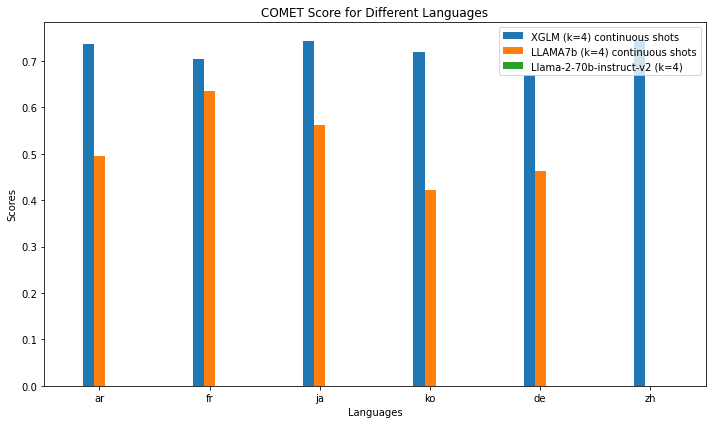

In [6]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects1 = ax.bar(x - width, xglm_comet_list, width, label='XGLM (k=4) continuous shots')
rects4 = ax.bar(x, llama_comet_list, width, label='LLAMA7b (k=4) continuous shots')
rects6 = ax.bar(x +width, llama2_70b_comet_list, width, label='Llama-2-70b-instruct-v2 (k=4)')
# mBART ko/zh tokenizer models

# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('COMET Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


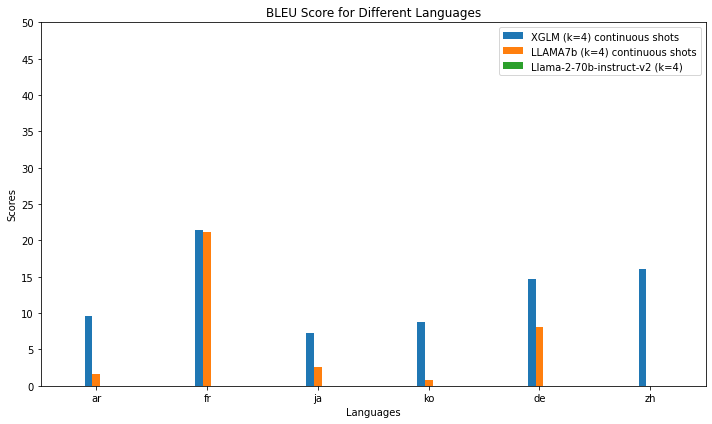

In [9]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.07  # The width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, len(lang_list)))
rects1 = ax.bar(x - width, xglm_bleu_list, width, label='XGLM (k=4) continuous shots')
rects2 = ax.bar(x, llama_bleu_list, width, label='LLAMA7b (k=4) continuous shots')
rects12 = ax.bar(x +width, llama2_70b_bleu_list, width, label='Llama-2-70b-instruct-v2 (k=4)')


# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('BLEU Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

plt.yticks(range(0, 55,5))

# Displaying the plot
plt.tight_layout()
plt.show()
